In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from pyfonts import load_font
from drawarrow import fig_arrow, ax_arrow

In [26]:
font_path = 'SweetLeaf.ttf'
sweet_leaf = FontProperties(fname=font_path)

In [27]:
gantari_regular = load_font(
    font_url="https://github.com/Lafontype/Gantari/blob/main/fonts/ttf/Gantari-Regular.ttf?raw=true"
)

#gantari_bold = load_font(
#    font_url="https://github.com/Lafontype/Gantari/blob/main/fonts/ttf/Gantari-ExtraBold.ttf?raw=true"
#)

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-22/daily_accidents.csv')

In [29]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.strftime("%Y")
df["month"] = df["date"].dt.strftime("%b")
df["day"] = df["date"].dt.strftime("%-d").astype(int)
df["month_day"] = df["date"].dt.strftime("%b-%d")
df["abb_day"] = df["date"].dt.strftime("%a")

In [30]:
df["name"] = df['month_day'].replace({
    "Jan-01": "New Year Day",
    "Feb-14": "Valentine Day",
    "Apr-20": "Weed Day",
    "May-01": "Labour Day",
    "Jul-04": "Independence Day",
    "Dec-25": "Christmas Day"
})

thanksgiving_dates = pd.to_datetime([
    "1992-11-26", "1993-11-25", "1994-11-24", "1995-11-23", "1996-11-28",
    "1997-11-27", "1998-11-26", "1999-11-25", "2000-11-23", "2001-11-22",
    "2002-11-28", "2003-11-27", "2004-11-25", "2005-11-24", "2006-11-23",
    "2007-11-22", "2008-11-27", "2009-11-26", "2010-11-25", "2011-11-24",
    "2012-11-22", "2013-11-28", "2014-11-27", "2015-11-26", "2016-11-24"
])

easter_dates = pd.to_datetime([
    "1992-04-19", "1993-04-11", "1994-04-03", "1995-04-16", "1996-04-07",
    "1997-03-03", "1998-04-12", "1999-04-04", "2000-04-23", "2001-04-15",
    "2002-03-31", "2003-04-20", "2004-04-11", "2005-03-27", "2006-04-16",
    "2007-04-08", "2008-03-23", "2009-04-12", "2010-04-04", "2011-04-24",
    "2012-04-08", "2013-03-31", "2014-04-20", "2015-04-05", "2016-03-27"
])

df.loc[df['date'].isin(thanksgiving_dates), 'name'] = "Thanksgiving Day"
df.loc[df['date'].isin(easter_dates), 'name'] = "Easter Day"

df['name'] = df['name'].apply(lambda x: x if 'Day' in str(x) else 'Other')

In [31]:
df.head(2)

,date,fatalities_count,year,month,day,month_day,abb_day,name
0,1992-01-01,144,1992,Jan,1,Jan-01,Wed,New Year Day
1,1992-01-02,111,1992,Jan,2,Jan-02,Thu,Other


In [32]:
total = df["fatalities_count"].sum()

In [33]:
count_by_name = df.groupby("name")["fatalities_count"].sum().sort_values().reset_index()

In [34]:
count_by_name

,name,fatalities_count
0,Christmas Day,2798
1,Weed Day,3182
2,Valentine Day,3324
3,Easter Day,3416
4,Thanksgiving Day,3506
5,Labour Day,3628
6,New Year Day,3917
7,Independence Day,4400
8,Other,1296663


In [35]:
count_by_name2 = count_by_name.iloc[:-1].reset_index(drop=True)

In [36]:
count_by_name2

,name,fatalities_count
0,Christmas Day,2798
1,Weed Day,3182
2,Valentine Day,3324
3,Easter Day,3416
4,Thanksgiving Day,3506
5,Labour Day,3628
6,New Year Day,3917
7,Independence Day,4400


In [37]:
count_by_day = df.groupby("abb_day")["fatalities_count"].sum().sort_values(ascending=False).reset_index()
count_by_day["perc"] = count_by_day["fatalities_count"]/total*100

In [38]:
count_by_day

,abb_day,fatalities_count,perc
0,Sat,232803,17.572239
1,Fri,214731,16.208144
2,Sun,198294,14.967460
3,Thu,177366,13.387790
4,Wed,169007,12.756843
5,Mon,168534,12.721141
6,Tue,164099,12.386382


In [39]:
apr = df[df["month"]=="Apr"]

In [40]:
apr = apr[["month", "day", "fatalities_count"]]

In [41]:
apr_agg = apr.sort_values("day").groupby("day")["fatalities_count"].sum().reset_index()

In [42]:
apr_agg.head(2)

,day,fatalities_count
0,1,3526
1,2,3525


In [43]:
apr_max = apr_agg["fatalities_count"].max()
apr_min = apr_agg["fatalities_count"].min()

In [44]:
apr_weed = apr_agg.iloc[19, 1]

In [67]:
weed_day = df[df["name"]=="Weed Day"].groupby("abb_day")["fatalities_count"].sum().sort_values().reset_index()
weed_day["perc"] = weed_day["fatalities_count"]/weed_day["fatalities_count"].sum()*100

In [69]:
weed_wed = weed_day.iloc[6, 2]

In [70]:
weed_wed

np.float64(16.059082338152106)

In [71]:
ind_day = df[df["name"]=="Independence Day"].groupby("abb_day")["fatalities_count"].sum().sort_values().reset_index()
ind_day["perc"] = ind_day["fatalities_count"]/ind_day["fatalities_count"].sum()*100

In [73]:
ind_sat = ind_day.iloc[6, 2]

In [74]:
ind_sat

np.float64(17.795454545454543)

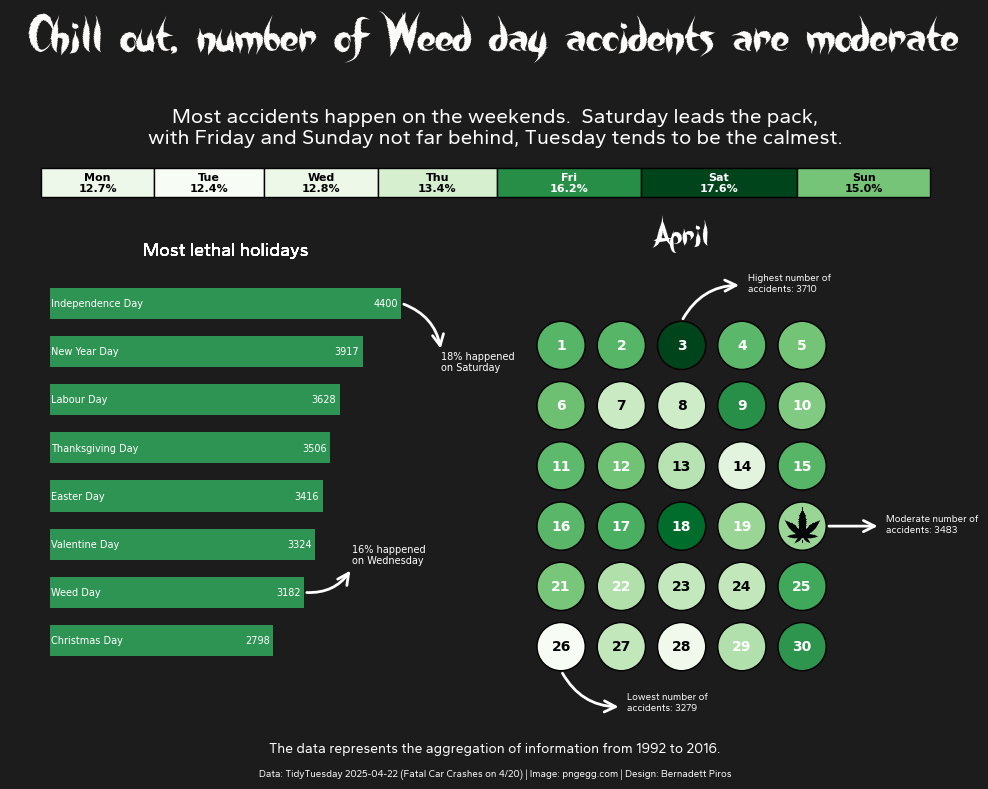

In [128]:
scheme = """
BBBB
CCAA
CCAA
"""

fig, axs = plt.subplot_mosaic(scheme, figsize=(10, 6), gridspec_kw={"height_ratios": [0.15, 1, 1]}, layout="tight") 

#A plot
nrows, ncols = 6, 5
ax = axs["A"]
ax.set_xlim(0, ncols+2)
ax.set_ylim(-1, nrows+1)
ax.axis("off")

ax.text(2.5, 7.2, s="April", color="white", font=sweet_leaf, size=20, ha="center")

icon_img = mpimg.imread("pngeggblack.png")

norm = plt.Normalize(apr_agg['fatalities_count'].min(), apr_agg['fatalities_count'].max())
cmap = cm.Greens

for i, row in apr_agg.iterrows():
    day = row['day']
    count = row['fatalities_count']
    
    row_idx = (day - 1) // ncols
    col_idx = (day - 1) % ncols
    
    x = col_idx + 0.5
    y = nrows - row_idx - 0.5

    if day == 20:
        circle = patches.Circle((x, y), 0.4, edgecolor="black", facecolor=color, zorder=1)
        ax.add_patch(circle)      
        
        ax.imshow(icon_img, extent=(x-0.3, x+0.3, y-0.3, y+0.3), zorder=2)
    else:
        color = cmap(norm(count))
        circle = patches.Circle((x, y), 0.4, edgecolor="black", facecolor=color, zorder=1)
        ax.add_patch(circle)
        ax.text(x, y, str(day), ha="center", va="center", fontsize=10, weight='bold',
                color='white' if count > 3415 else 'black', zorder=2)

ax_arrow(
   tail_position=[2.5, 5.9],
   head_position=[3.5, 6.5],
   color="white",
   width=2,
   fill_head=False,   
   radius=-0.3,
   ax=axs["A"]
)

ax.text(3.6, 6.4, f"Highest number of\naccidents: {apr_max}",
        color="white", font=gantari_regular, size=7)        

ax_arrow(
   tail_position=[0.5, 0.1],
   head_position=[1.5,-0.5],
   color="white",
   width=2,
   fill_head=False,   
   radius=0.3,
   ax=axs["A"]
)

ax.text(1.6, -0.55, f"Lowest number of\naccidents: {apr_min}",
        color="white", font=gantari_regular, size=7)
        
ax_arrow(
   tail_position=[4.9, 2.5],
   head_position=[5.8, 2.5],
   color="white",
   width=2,
   fill_head=False,   
   ax=axs["A"]
)

ax.text(5.9, 2.4, f"Moderate number of\naccidents: {apr_weed}",
        color="white", font=gantari_regular, size=7)
               
# B plot
ax = axs["B"]
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
count_by_day['abb_day'] = pd.Categorical(count_by_day['abb_day'], categories=day_order, ordered=True)
count_by_day = count_by_day.sort_values('abb_day')

percents = count_by_day['perc'].values
days = count_by_day['abb_day'].values

data_cum = np.cumsum(percents)
starts = data_cum - percents

norm = plt.Normalize(min(percents), max(percents))
colors = [cm.Greens(norm(p)) for p in percents]

ax.barh(0, percents, height=0.5, left=starts, color=colors, edgecolor='black')

for width, start, label, day in zip(percents, starts, percents, days):
    ax.text(start + width / 2, 0, f'{day}\n{label:.1f}%', ha='center', va='center',
            fontsize=8, color='white' if width > 15 else 'black', weight='bold')
    ax.set_xlim(-3.5, 103.5)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_frame_on(False)
    ax.tick_params(length=0)
    
# C plot
ax = axs["C"]
for i, row in count_by_name2.iterrows():
    name = row["name"]
    count = row["fatalities_count"]
    bars = axs["C"].barh(name, count, height=0.65, color="#2e9453")
    ax.text(x=10, y=i, s=name, color="white", ha="left", va="center", size=7)

    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width-350, y, f'{width}', color="white", va='center', ha='left', fontsize=7)
        ax.set_facecolor("#1C1C1C")
        ax.spines[["left", "bottom", "right", "top"]].set_visible(False)
        ax.tick_params(length=0)
        ax.set_xticks([])
        ax.set_yticks([])  
        ax.text(2200, 8, s="Most lethal holidays", color="white", font=gantari_regular, size=13, ha="center")
        ax.set_xlim(-500, 5000)
        ax.set_ylim(-2, 8)

ax_arrow(
   tail_position=[4400, 7],
   head_position=[4900, 6],
   color="white",
   width=2,
   fill_head=False,   
   radius=-0.3,
   ax=axs["C"]
   )

ax.text(4900, 5.6, f"{ind_sat:.0f}% happened\non Saturday", color="white", size=7)   

ax_arrow(
   tail_position=[3182, 1],
   head_position=[3782, 1.5],
   color="white",
   width=2,
   fill_head=False,   
   radius=0.3,
   ax=axs["C"]
   )

ax.text(3782, 1.6, f"{weed_wed:.0f}% happened\non Wednesday", color="white", size=7)  

fig.text(0.5, 1.08, s="Chill out, number of Weed day accidents are moderate\n", color="#FDFBF9", font=sweet_leaf, size=30, ha="center")

fig.text(0.5, 0.98, "Most accidents happen on the weekends.  Saturday leads the pack,\nwith Friday and Sunday not far behind, Tuesday tends to be the calmest.\n",
            color="white", size=15, font=gantari_regular, ha="center")

fig.text(0.5, 0, "The data represents the aggregation of information from 1992 to 2016.", color="white", size=10, font=gantari_regular, ha="center")

fig.set_facecolor("#1C1C1C") 

fig.text(0.5, -0.04, "Data: TidyTuesday 2025-04-22 (Fatal Car Crashes on 4/20) | Image: pngegg.com | Design: Bernadett Piros",
         color="white", font=gantari_regular, size=7, ha="center")

plt.show()

#fig.savefig("2025-04-22.png", bbox_inches='tight', pad_inches=0.2)